<a href="https://colab.research.google.com/github/nramelia2/Artificial-Intelligence/blob/main/MAKSIMASI/Maksimasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Penyelesaian Solusi Pemilihan Bahan Pangan Ternak Berdasarkan Kandungan Nutrisinya Menggunakan Algoritma Genetik

In [ ]:
import numpy as np # membuat objek N-dimensi array, proses komputasi numerik.
import pandas as pd # mengelola data berbentuk tabel.
import random as rd # menghasilkan angka acak.
from random import randint # menghasilkan angka acak.
import matplotlib.pyplot as plt

In [ ]:
banyak_pakan = np.arange(1,8) # ada 7 jenis data.

#Nama Pakan : Jagung, Dedak, Ampas kelapa, CGF, Polas Gandum, Pur ayam, Ampas Tahu
harga = (3000,4000,4000,6000,8000,11000,13000)
nilai_nutrisi = (3250,1750,3500,4370,2160,3550,4140) # sebagai nilai fitness.

print('The list is as follows:')
print('Item No.   harga   nilai nutrisi')
# perulangan banyak pakan, harga, nilai nutrisi.
for i in range(banyak_pakan.shape[0]): # shape - jumlah baris dan kolom data.
    print('{0}          {1}         {2}\n'.format(banyak_pakan[i], harga[i], nilai_nutrisi[i])) # isi variabel.


# Input kromosom
print("Masukkan Jumlah Kromosom Yang Diinginkan : ")
jumlah_kromosom = int(input())
print("\n")
# jumlah populasi hasil dari (jumlah kromosom, jumlah banyak pakan).
jumlah_pop = (jumlah_kromosom, banyak_pakan.shape[0])
print('jumlah populasi = {}'.format(jumlah_pop))
print("\n")

populasi_awal = np.random.randint(2, size = jumlah_pop) # 2 untuk mengubah int menjadi 2 bilangan saja (0 1 - biner).
populasi_awal = populasi_awal.astype(int) # astype - mengubah data menjadi tipe tertentu.
print("Masukkan Jumlah Maksimal Generasi Yang Diinginkan : ")
num_generations = int(input())
print("\n")

print("Masukkan Harga Maksimal : ")
maksimal_barang = int(input())
print("\n")

print("Masukkan Nilai Crossover Rate : ")
nilai_pc = float(input())
print("\n")

print("Masukkan Nilai Mutation Rate : ")
nilai_pm = float(input())
print("\n")

print('Initial populasi: \n{}'.format(populasi_awal))

The list is as follows:
Item No.   harga   nilai nutrisi
1          3000         3250

2          4000         1750

3          4000         3500

4          6000         4370

5          8000         2160

6          11000         3550

7          13000         4140

Masukkan Jumlah Kromosom Yang Diinginkan : 
10


jumlah populasi = (10, 7)


Masukkan Jumlah Maksimal Generasi Yang Diinginkan : 
25


Masukkan Harga Maksimal : 
25000


Masukkan Nilai Crossover Rate : 
0.55


Masukkan Nilai Mutation Rate : 
0.7


Initial populasi: 
[[0 0 0 1 0 1 1]
 [1 0 0 0 1 0 0]
 [0 1 0 1 0 1 0]
 [1 1 1 0 1 0 0]
 [1 1 0 0 0 1 1]
 [1 0 1 1 1 0 1]
 [0 0 1 1 0 1 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 1 1 0 1 0]]


In [ ]:
# Fitness
def cal_fitness(harga, nilai_nutrisi, populasi, threshold): # threshold - ambang.
    fitness = np.empty(populasi.shape[0]) # mengembalikan array dengan bentuk dan ukuran yang sama dengan nilai acak sebagai entrinya.
    for i in range(populasi.shape[0]):
        S1 = np.sum(populasi[i] * nilai_nutrisi)
        S2 = np.sum(populasi[i] * harga)
        if S2 <= threshold:
            fitness[i] = S1
        else :
            fitness[i] = 0 
    return fitness.astype(int)      


In [ ]:
print('fitness Pertama : \n{}\n'.format(cal_fitness(harga, nilai_nutrisi, populasi_awal, maksimal_barang)))

fitness Pertama : 
[    0  5410  9670 10660     0     0 11420  3500  2160 11420]



In [ ]:
def selection(fitness, num_parents, populasi):
    fitness = list(fitness) # menyimpan sekumpulan item yang diapit oleh dua kurung siku.
    parents = np.empty((num_parents, populasi.shape[1]))
    # seleksi parents terbaik.
    for i in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness)) # np.where mengembalikan elemen yang dipilih dari x atau y tergantung pada kondisi.
        parents[i,:] = populasi[max_fitness_idx[0][0], :]
        fitness[max_fitness_idx[0][0]] = -999999
    return parents 

In [ ]:
def crossover(parents, num_offsprings):
    offsprings = np.empty((num_offsprings, parents.shape[1]))
    crossover_point = int(parents.shape[1]/2)
    crossover_rate = nilai_pc # roullet wheel
    i=0
    while (parents.shape[0] < num_offsprings):
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        x = rd.random()
        if x > crossover_rate:
            continue
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        offsprings[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        offsprings[i,crossover_point:] = parents[parent2_index,crossover_point:]
        i=+1
    return offsprings   


In [ ]:
def mutation(offsprings): # offsprings - mencari keturunan
    mutants = np.empty((offsprings.shape))
    mutation_rate = nilai_pm
    for i in range(mutants.shape[0]):
        random_nilai_prioritas = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_nilai_prioritas > mutation_rate:
            continue
        int_random_nilai_prioritas = randint(0,offsprings.shape[1]-1)    
        if mutants[i,int_random_nilai_prioritas] == 0 :
            mutants[i,int_random_nilai_prioritas] = 1
        else :
            mutants[i,int_random_nilai_prioritas] = 0
    return mutants      


In [ ]:
# hasil semua generasi akhir (elitism).
def optimize(harga, nilai_nutrisi, populasi, jumlah_pop, num_generations, threshold):
    parameters, fitness_history = [], []
    num_parents = int(jumlah_pop[0]/2)
    num_offsprings = jumlah_pop[0] - num_parents 
    for i in range(num_generations):
        fitness = cal_fitness(harga, nilai_nutrisi, populasi, threshold)
        fitness_history.append(fitness)
        parents = selection(fitness, num_parents, populasi)
        
        offsprings = crossover(parents, num_offsprings)
       
        mutants = mutation(offsprings)
        populasi[0:parents.shape[0], :] = parents
        populasi[parents.shape[0]:, :] = mutants
    print("selection : \n")
    print(parents)
    print("crossover : \n")
    print(offsprings)
    print("mutasi : \n")
    print(mutants)
    print('Generasi akhir: \n{}\n'.format(populasi))
    fitness_last_gen = cal_fitness(harga, nilai_nutrisi, populasi, threshold)      
    print('Fitness dari generasi akhir: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(populasi[max_fitness[0][0],:])
    return parameters, fitness_history


In [ ]:
parameters, fitness_history = optimize(harga, nilai_nutrisi, populasi_awal, jumlah_pop, num_generations, maksimal_barang)
print('Parameter yang dioptimalkan untuk input yang diberikan adalah: \n{}'.format(parameters))
selected_items = banyak_pakan * parameters

print('\nBahan pangan yang akan dibeli adalah:')
for i in range(selected_items.shape[1]):
  if selected_items[0][i] != 0:
     print('{}\n'.format(selected_items[0][i]))


selection : 

[[1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0.]]
crossover : 

[[1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0.]]
mutasi : 

[[1. 1. 0. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 1. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0.]]
Generasi akhir: 
[[1 1 1 1 1 0 0]
 [1 1 1 1 1 0 0]
 [1 1 1 1 1 0 0]
 [1 1 1 1 1 0 0]
 [1 1 1 1 1 0 0]
 [1 1 0 1 1 0 0]
 [0 1 1 1 1 0 0]
 [1 1 1 0 1 0 0]
 [0 1 1 1 1 0 0]
 [1 1 1 1 1 0 0]]

Fitness dari generasi akhir: 
[15030 15030 15030 15030 15030 11530 11780 10660 11780 15030]

Parameter yang dioptimalkan untuk input yang diberikan adalah: 
[array([1, 1, 1, 1, 1, 0, 0])]

Bahan pangan yang akan dibeli adalah:
1

2

3

4

5



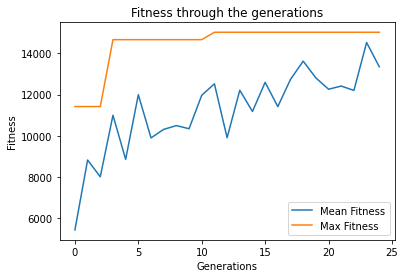

(25, 10)


In [ ]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)